For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.`

Hypothese - Has the network latency gone up since we switched internet service providers?


null - switch internet providers has not affact the network latency
alternative -switching interent provider has affact the latency 

type 1(false positive)  - 

type 2 -

Is the website redesign any good?


null
alternative

type 1

type 2

Is our television ad driving more sales?


null
alternative 

type 1 

type 2

PART 2 

In [5]:

import pandas as pd
import numpy as np

from pydataset import data

from scipy import stats


Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.

In [84]:
data_dict = ('Codeup Students':[49,1], 'Not a Codeup' : [20,30])
data_dict

SyntaxError: invalid syntax (3628712847.py, line 1)

null - There is no relationship between a code student and using a macbook 
alternative -There is relationship between a code student and using a macbook  

Choose another 2 categorical variables from the mpg dataset.

In [40]:
df = data('mpg')
# df.head()

In [50]:
df["is_automatic"] = np.where(df.trans.str.startswith('a'), 'auto', 'mannal')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,mannal
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,mannal
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,mannal
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,mannal


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  is_automatic  234 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.8+ KB


In [43]:
df['class'].value_counts()

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

In [52]:
df.is_automatic.value_counts()
#f = front-wheel drive, r = rear wheel drive, 4 = 4wd 


is_automatic
auto      157
mannal     77
Name: count, dtype: int64

null - the class of vechiel does not affect if it is automatic 
alternative- the class does affect if it is automatic  

In [11]:
alpha = .05

In [54]:
observed = pd.crosstab(df['class'],df.is_automatic)
observed

is_automatic,auto,mannal
class,,
2seater,2,3
compact,24,23
midsize,29,12
minivan,11,0
pickup,20,13
subcompact,16,19
suv,55,7


In [55]:
len(stats.chi2_contingency(observed))

4

In [56]:
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [57]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 2  3]
 [24 23]
 [29 12]
 [11  0]
 [20 13]
 [16 19]
 [55  7]]

Expected
[[ 3  1]
 [31 15]
 [27 13]
 [ 7  3]
 [22 10]
 [23 11]
 [41 20]]

----
chi^2 = 33.7700
p     = 0.0000


In [60]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


In [66]:
from eny import user, password, host

In [67]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [85]:
query = '''
  select gender,dept_name,from_date,to_date 
 from departments
 join dept_emp 
	using (dept_no)
 join employees
	using (emp_no)
 where to_date > now()
 and dept_name in ('Sales','Marketing')
 order by to_date
 '''

In [86]:
df = pd.read_sql(query, url)
df

,gender,dept_name,from_date,to_date
0,F,Sales,1986-04-01,9999-01-01
1,F,Sales,1996-03-25,9999-01-01
2,M,Sales,1997-12-01,9999-01-01
3,F,Sales,1998-10-16,9999-01-01
4,F,Sales,1986-04-06,9999-01-01
...,...,...,...,...
52538,M,Sales,1999-03-21,9999-01-01
52539,M,Sales,1988-03-12,9999-01-01
52540,F,Sales,1988-09-15,9999-01-01
52541,M,Sales,1988-08-27,9999-01-01


In [ ]:
null-
alternative-

In [87]:
df.gender.value_counts()

gender
M    31680
F    20863
Name: count, dtype: int64

In [88]:
df.dept_name.value_counts()

dept_name
Sales        37701
Marketing    14842
Name: count, dtype: int64

In [90]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


Part 3

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Answer with the type of stats test you would use (assume normal distribution):

Is there a relationship between the length of your arm and the length of your foot?

In [ ]:
correlation

Does smoking affect when or not someone has lung cancer?


In [ ]:
chi2

Is gender independent of a person’s blood type?


In [ ]:
chi2

Does whether or not a person has a cat or dog affect whether they live in an apartment?

In [ ]:
chi2

Does the length of time of the lecture correlate with a student's grade?

In [ ]:
correlation

Use the telco_churn data.

Does tenure correlate with monthly charges? - No it does not beacuse they have have other serivces that make more costly 

Total charges?

What happens if you control for phone and internet service?

In [139]:
url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'

In [140]:
query = '''
select * from customers
'''

In [141]:
df = pd.read_sql(query, url)
df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [142]:
# df.info()

null - there is not a linear relationship between tenure and total_charges
alternative- there is a linear relationship between tenure and total_charges

In [143]:
df.total_charges.value_counts()

total_charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
           ..
2387.75     1
6302.8      1
2058.5      1
829.55      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [114]:
df.tenure.value_counts().head()

tenure
1     613
72    362
2     238
3     200
4     176
Name: count, dtype: int64

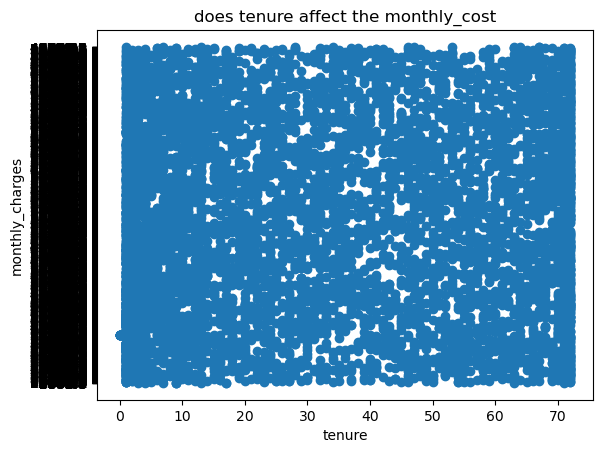

In [144]:
plt.scatter(df.tenure,df.total_charges)
plt.title('does tenure affect the monthly_cost')
plt.xlabel('tenure')
plt.ylabel('monthly_charges')
plt.show()

Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?

In [150]:
url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [151]:
query = '''
select *
 from salaries
 join employees 
	using (emp_no)
 where to_date > now()
  order by to_date '''

In [152]:
df = pd.read_sql(query, url)
df

,emp_no,salary,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,493505,47709,2002-02-21,9999-01-01,1952-05-15,Sushant,Basawa,F,1985-02-28
1,493507,92220,2001-08-16,9999-01-01,1954-05-26,Gay,Prenel,F,1993-08-18
2,493508,44829,2001-10-14,9999-01-01,1961-11-03,Sugwoo,Validov,F,1986-04-16
3,493509,77927,2002-04-22,9999-01-01,1955-01-12,Zito,Rande,F,1985-09-19
4,493510,55612,2001-10-12,9999-01-01,1956-05-03,Theirry,Giarratana,M,1991-09-30
...,...,...,...,...,...,...,...,...,...
240119,295615,54545,2001-09-04,9999-01-01,1953-12-21,Mang,Khamsi,F,1988-09-03
240120,295616,70917,2001-09-01,9999-01-01,1962-03-24,Florina,Babu,M,1986-09-05
240121,295618,80379,2002-05-24,9999-01-01,1956-03-25,Jaideep,Pauthner,F,1994-05-26
240122,295620,94715,2001-09-14,9999-01-01,1958-09-02,Youpyo,Ushiama,M,1988-09-17


Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Use the sleepstudy data.
Is there a relationship between days and reaction time?

In [ ]:
null- there is no relationship between days 
alternative-

In [137]:
# data('sleepstudy', show_doc=True)

In [125]:
df = data('sleepstudy')
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


part 4

Answer with the type of test you would use (assume normal distribution):
Is there a difference in grades of students on the second floor compared to grades of all students?


In [4]:
# comparing grades of students on the second floor to all of them 

In [ ]:
# 1 sample2 tail t test different 

Are adults who drink milk taller than adults who don't drink milk?

In [ ]:
# comparing adults who drink milk 
# to those who do not drink milk and if they are taller 

In [ ]:
# 2 sample, 1 tail, 1 test    less than or more than

Is the price of gas higher in Texas or in New Mexico?


In [ ]:
# comparing gas price from texas to nm

In [ ]:
# 2 smaple 1 tail 1 test 

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

In [ ]:
# anova

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [7]:
mean1 = 90
sd1 = 15
sam1 = 40


sam2 = 50
mean2 = 100
sd2 = 20

Null-the time it take to sell his office is the same 

Alt-the time it take to sell his office is not the same 

In [8]:
stats.ttest_ind_from_stats(90,15,40,
                           100,20,50)

Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [9]:
t_stat, p_val = stats.ttest_ind_from_stats(90,15,40,
                           100,20,50)

In [14]:
if p_val < alpha:
    print('We can reject null!')
    print(f'Our p_val is {p_val}')
else:
    print('We fail to reject null!')


We can reject null!
Our p_val is 0.01020985244923939


Load the mpg dataset and use it to answer the following questions:

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [ ]:
# 2 sample 2 tail

Are compact cars more fuel-efficient than the average car?

In [ ]:
# 1 sample 1 tail, 1 test

Do manual cars get better gas mileage than automatic cars?